## Loading Necessary Libraries

In [18]:
# general
import re
import gc
import os
import csv
import time
import math
import pickle
from tqdm import tqdm

# data handling
import numpy as np
import pandas as pd

# HTML parsing
from bs4 import BeautifulSoup

# plotting
import matplotlib.pyplot as plt

# chunker
import torch
from torch import cuda

/Users/rishideychowdhury/Desktop/Amazon-PAE/env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/rishideychowdhury/Desktop/Amazon-PAE/env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/rishideychowdhury/Desktop/Amazon-PAE/en

## Load Data

In [13]:
# 2023
# data = pd.read_csv('../data/2023/train-v3.csv', usecols=['BULLET_POINTS'])
data = pd.read_csv('../data/2023/train-v3.csv', usecols=['PRODUCT_TYPE_ID'])

In [6]:
data = data.fillna('')

In [5]:
# data = data.to_numpy().tolist()

In [6]:
# data = pd.DataFrame([' . '.join([str(bp) for bp in bps if str(bp) != '']) for bps in data])

In [7]:
# data

In [7]:
# data = data[~data.iloc[:,0].isin([''])]

In [9]:
# data_bps_idxs = data.index.to_list()

In [14]:
data

,PRODUCT_TYPE_ID
0,1650
1,2755
2,7537
3,2996
4,6112
...,...
2249693,3009
2249694,3413
2249695,1574
2249696,592


In [71]:
data.value_counts()

PRODUCT_TYPE_ID
1                  121199
12064               57554
0                   50505
123                 31527
6104                29690
                    ...  
3551                    1
8854                    1
3549                    1
3548                    1
6641                    1
Name: count, Length: 12907, dtype: int64

In [19]:
data[data.PRODUCT_TYPE_ID.isin([1650])].index.to_list()

[0,
 491,
 618,
 1152,
 1375,
 2437,
 3060,
 3276,
 3291,
 3504,
 3692,
 4434,
 4528,
 4861,
 5004,
 5217,
 5964,
 6915,
 7467,
 8816,
 10023,
 10412,
 11146,
 11173,
 11994,
 12384,
 12901,
 12909,
 13532,
 14361,
 14849,
 15450,
 15955,
 16510,
 16679,
 16906,
 17386,
 17699,
 18123,
 18433,
 18475,
 19156,
 19803,
 20032,
 20460,
 20805,
 21337,
 22868,
 23799,
 24595,
 25493,
 25794,
 26771,
 26815,
 27292,
 27643,
 27928,
 28521,
 28799,
 29495,
 29695,
 29826,
 30833,
 30924,
 31241,
 31722,
 31743,
 31956,
 32089,
 32939,
 33121,
 33218,
 33683,
 33975,
 34142,
 34195,
 34891,
 35985,
 36104,
 36965,
 37028,
 37249,
 40092,
 40337,
 41568,
 41984,
 42242,
 42344,
 42578,
 42660,
 43889,
 44134,
 44723,
 45393,
 45709,
 47694,
 49632,
 49964,
 51698,
 52114,
 52127,
 52436,
 53225,
 53744,
 54156,
 54560,
 56477,
 57076,
 57629,
 58251,
 59339,
 59652,
 59813,
 60185,
 61819,
 62051,
 62506,
 62794,
 63103,
 63414,
 63729,
 63978,
 64022,
 64389,
 64479,
 64651,
 64710,
 65168,
 

In [3]:
chunked_title = pickle.load(open(f'../data/2023/temp-titles/chunked-train-title-2023.pkl', 'rb'))

In [16]:
pd.DataFrame(chunked_title)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,"(ArtzFolio Tulip Flowers Blackout Curtain, NP)","(for, PP)","(Door , Window and Room, NP)","(Eyelets, NP)","(Tie Back, NP)","(Canvas Fabric, NP)","(Width 4.5feet, NP)","(54inch, NP)","(Height, NP)","(5 feet, NP)",...,None,None,None,None,None,None,None,None,None,None
1,"(Marks and Spencer Girls, NP)","(' Pyjama Sets T86 2561C Navy Mix, NP)","(9, NP)","(to, PP)","(10Y, NP)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,(PRIKNIK Horn Red Electric Air Horn Compressor...,"(Trumpet, VP)","(Loud, NP)","(Compatible, ADJP)","(with, PP)","(SX4, NP)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"(ALISHAH Women, NP)","(', NP)","(Cotton Ankle Length Leggings Combo, NP)","(of, PP)","(2, NP)","(12 Colors, NP)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"(The United Empire Loyalists, NP)","(A Chronicle, NP)","(of, PP)","(the Great Migration, NP)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249693,"(Nike Women, NP)","(As, PP)","(W Ny Df Swsh Hn Kh Bra, NP)","(CZ7610, NP)","(to, PP)","(010 Black, NP)","(DK Smoke Grey M, NP)",None,None,None,...,None,None,None,None,None,None,None,None,None,None
2249694,"(3PCS, NP)","(Goose Game Cute Cartoon Enamel Pins, NP)","(Funny Knife Cat Lapel Brooches, NP)","(for, PP)","(Backpack, NP)","(Hats and Clothing Accessories, NP)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2249695,"(Kangroo Sweep Movement, NP)","(Printed, VP)","(Wooden Wall Clock, NP)","(for, PP)","(Home, NP)","(12 x 12 Inch, NP)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2249696,"(Electro Voice EKX-BRKT15, NP)","(Wall Mount Bracket, NP)","(for, PP)","(EKX-15 EKX-15P Black, NP)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Product Relationships

### Title

In [151]:
PROD_TYPE = 1650

In [113]:
chunked_prod_title = [chunked_title[i] for i in data[data.PRODUCT_TYPE_ID.isin([PROD_TYPE])].index.to_list()]

In [114]:
len(chunked_prod_title)

4808

Here, I extract based on chunks possible relationship of various attributes and values with a product.

In [10]:
tag_names = [
  'ADJP',
  'ADVP',
  'CONJP',
  'INTJ',
  'LST',
  'NP',
  'PP',
  'PRT',
  'SBAR',
  'VP'
]

In [153]:
prod_relationships_prod_title = {
  name: set() for name in tag_names
}

In [154]:
for name in tqdm(tag_names):
  prod_relationships_prod_title[name] = set([
        chunk[0].lower()
        for title in chunked_prod_title
        for chunk in title
        if chunk[1] == name
      ])

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 109.15it/s]


In [155]:
for name in tag_names:
  print(f'***{name}***')
  print(', '.join(prod_relationships_prod_title[name]))
  print()

***ADJP***
90 %, long, fhlch-vet13191, complete, x, soft, reducing, 52-inch, transparent, sunlight, 100 %, suitable, 80 %, prtw-d11, great, customizable, prtw-d23, wide, off-white, white, fresh, romantic, certain

***ADVP***
yes, up, elegantly, 37-inch, 118-inch, 60-inch, back, through, 42-inch, 52-inch

***CONJP***


***INTJ***
no

***LST***
4, 1, 5ft, n, 2

***NP***
devsang sheer polyester floral transparent eyelet, abstract lines, homecrust microfiber curtain, lavender white, inira trendz polyester floral window curtain, contemporary milan blackout , ivory , 54 inch w, polyester blend animal print window curtain, white )pack, thermal insulated grommet unlined window curtains 2 panels, shekhawat enterprise curtain wooden beads rope tie back bedroom decor window drapery holdbacks gray, 84 x 54 inches , white ) code, amia butterfly, heavy quality curtain drapes, pinkcream, akin towel eyelet patta panel polyester solid curtainsset, jd-fab solid plain room-darkening polyester eyelet long

In [ ]:
prod_relationships_title = {
  name: set() for name in tag_names
}

In [6]:
for name in tqdm(tag_names):
  prod_relationships_title[name] = set([
        chunk[0].lower()
        for title in chunked_title
        for chunk in title
        if chunk[1] == name
      ])

100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.55it/s]


In [10]:
prod_relationships_title['VP']

{'com',
 'had recovered',
 'customize making',
 'dispensersuspended',
 'pampering',
 'mouches',
 'grilling',
 'lover',
 'pounce',
 'successfully flying and choosing',
 'chandelle',
 'invitado',
 'to kick-start',
 'guy',
 'rediscover',
 'not trying too hard',
 'start managing',
 'notitieblok',
 'keepin',
 'spv01',
 'to attract and manage',
 'hymne',
 'hang or keep',
 'gideon',
 'exhausting',
 'digitales',
 'sitted',
 'outdoors',
 'deterring',
 'prong',
 'studied using',
 'running or hiking or walking',
 'spent doing',
 'uncropped',
 'gcs-379227',
 'didnt know',
 'assistent',
 'exactes',
 'représentationsregards',
 'coasting',
 'is putting',
 "didn ' t warn",
 'can break',
 'light',
 'will prolong',
 'should select',
 'dessen',
 'twist',
 'creases',
 'do not pull or snag',
 'mould',
 'patches',
 'sturdy',
 'do come',
 'will create',
 'saddled',
 'déssins',
 'to get rid',
 'featuring',
 'can overcome',
 'could never forget',
 'visite',
 'bullying',
 'to grow and use',
 'waited',
 'georget

In [9]:
len(prod_relationships_title['VP'])

38263

### Bullet Points

In [2]:
# 2023
data2 = pd.read_csv('../data/2023/train.csv', usecols=['BULLET_POINTS', 'PRODUCT_TYPE_ID'])

In [3]:
data2 = data2.fillna('')

In [4]:
data_bps_idx = data2[~data2.BULLET_POINTS.isin([''])].PRODUCT_TYPE_ID.to_list()

In [5]:
# chunked_desc = pickle.load(open(f'../data/2023/temp-descs/chunked-train-descs-2023.pkl', 'rb'))
chunked_bps = pickle.load(open(f'../data/2023/temp-bps/chunked-train-bps-2023.pkl', 'rb'))

In [6]:
len(chunked_bps)

1412322

In [240]:
PROD_TYPE = 1650

In [241]:
chunked_prod_bps = [chunked_bps[i] for i in range(len(chunked_bps)) if data_bps_idx[i] == PROD_TYPE]

In [242]:
len(chunked_prod_bps)

4778

In [243]:
data2[data2.PRODUCT_TYPE_ID == PROD_TYPE][data2[data2.PRODUCT_TYPE_ID == PROD_TYPE].BULLET_POINTS != '']

,BULLET_POINTS,PRODUCT_TYPE_ID
0,[LUXURIOUS & APPEALING: Beautiful custom-made ...,1650
491,"[Good quality and Suitable to use.,This Produc...",1650
618,[WHY COZY FURNISH CURTAINS: Our premium cotton...,1650
1152,"[Good quality and Suitable to use.,This Produc...",1650
1375,"[Transparency :Semi transparent, Hang Type:Eye...",1650
...,...,...
2246765,"[Good quality and Suitable to use.,This Produc...",1650
2247261,[Size Name: Long Door-9 Feet | Transparency: S...,1650
2247730,"[Material: Polyester.,Package Contents: 3 Piec...",1650
2249302,[LUXURIOUS & APPEALING: Beautiful custom-made ...,1650


In [244]:
for i in range(min(len(chunked_prod_bps), 100)):
  for j in range(len(chunked_prod_bps[i])):
    print(' '.join([x[0] + f' ({x[1]})'for x in chunked_prod_bps[i][j]]))
    print()
  print()
  print()

LUXURIOUS and APPEALING (NP) Beautiful custom-made curtains (NP) to decorate (VP) any home or office (NP) Includes (VP) inbuilt tieback (NP) to hold (VP) the curtain (NP) Completely finished (VP) ready to hang (VP) on (PP) walls and windows (NP)

MATERIAL (NP) Luxurious and versatile fabric (NP) with (PP) a natural finish (NP) High colour fastness (NP) State-of-the-art digital printing (NP) ensures (VP) colour consistency (NP) prevents (VP) any fading (NP) Eyelets (NP) Cotton Canvas (NP) Width 4.5feet (NP) 54inch (NP) Multicolour (NP) PACKAGE (NP) 2 Room Curtains Eyelets (NP) SIZE (NP) Height (NP) 5 feet (NP) 60 inch (NP) SET (NP) OF (PP) 2 pieces (NP)

BLACKOUT CURTAIN (NP) 100 % (NP) opaque (ADJP) heavy premium cotton canvas fabric (NP) Tight knitted (NP) long life (NP) durable fabric (NP) Printing (VP) only (ADVP) on (PP) front side (NP) with (PP) a plain colour back side (NP)

MADE (VP) TO (PP) PERFECTION (NP) Large eyelets (NP) at (PP) the top (NP) to put (VP) hanging hooks (NP) P

In [245]:
for i in range(min(len(chunked_prod_bps), 100)):
  for j in range(len(chunked_prod_bps[i])):
    print(' '.join([x[0] + f' ({x[1]})'for x in chunked_prod_bps[i][j] if x[1] != 'ADVP']))
    print()
  print()
  print()

LUXURIOUS and APPEALING (NP) Beautiful custom-made curtains (NP) to decorate (VP) any home or office (NP) Includes (VP) inbuilt tieback (NP) to hold (VP) the curtain (NP) Completely finished (VP) ready to hang (VP) on (PP) walls and windows (NP)

MATERIAL (NP) Luxurious and versatile fabric (NP) with (PP) a natural finish (NP) High colour fastness (NP) State-of-the-art digital printing (NP) ensures (VP) colour consistency (NP) prevents (VP) any fading (NP) Eyelets (NP) Cotton Canvas (NP) Width 4.5feet (NP) 54inch (NP) Multicolour (NP) PACKAGE (NP) 2 Room Curtains Eyelets (NP) SIZE (NP) Height (NP) 5 feet (NP) 60 inch (NP) SET (NP) OF (PP) 2 pieces (NP)

BLACKOUT CURTAIN (NP) 100 % (NP) opaque (ADJP) heavy premium cotton canvas fabric (NP) Tight knitted (NP) long life (NP) durable fabric (NP) Printing (VP) on (PP) front side (NP) with (PP) a plain colour back side (NP)

MADE (VP) TO (PP) PERFECTION (NP) Large eyelets (NP) at (PP) the top (NP) to put (VP) hanging hooks (NP) Perfectly tai

In [246]:
for i in range(min(len(chunked_prod_bps), 100)):
  for j in range(len(chunked_prod_bps[i])):
    print(' '.join([
      f'{x[0] if x[1] == "NP" else ""} {"--" if x[1] != "NP" else ""}({"AV" if x[1] == "NP" else x[0]}){"-->" if x[1] != "NP" else ""}' 
      for x in chunked_prod_bps[i][j] 
      if x[1] != 'ADVP'
    ]))
    print()
  print()
  print()

LUXURIOUS and APPEALING (AV) Beautiful custom-made curtains (AV)  --(to decorate)--> any home or office (AV)  --(Includes)--> inbuilt tieback (AV)  --(to hold)--> the curtain (AV)  --(Completely finished)-->  --(ready to hang)-->  --(on)--> walls and windows (AV)

MATERIAL (AV) Luxurious and versatile fabric (AV)  --(with)--> a natural finish (AV) High colour fastness (AV) State-of-the-art digital printing (AV)  --(ensures)--> colour consistency (AV)  --(prevents)--> any fading (AV) Eyelets (AV) Cotton Canvas (AV) Width 4.5feet (AV) 54inch (AV) Multicolour (AV) PACKAGE (AV) 2 Room Curtains Eyelets (AV) SIZE (AV) Height (AV) 5 feet (AV) 60 inch (AV) SET (AV)  --(OF)--> 2 pieces (AV)

BLACKOUT CURTAIN (AV) 100 % (AV)  --(opaque)--> heavy premium cotton canvas fabric (AV) Tight knitted (AV) long life (AV) durable fabric (AV)  --(Printing)-->  --(on)--> front side (AV)  --(with)--> a plain colour back side (AV)

 --(MADE)-->  --(TO)--> PERFECTION (AV) Large eyelets (AV)  --(at)--> the top 

In [203]:
prod_relationships_prod_bps = {
  name: set() for name in tag_names
}

In [204]:
for name in tqdm(tag_names):
  prod_relationships_prod_bps[name] = set([
        chunk[0].lower()
        for bps in chunked_prod_bps
        for bp in bps
        for chunk in bp
        if chunk[1] == name
      ])

100%|████████████████████████████████████████| 10/10 [00:00<00:00, 12565.32it/s]


In [205]:
for name in tag_names:
  print(f'***{name}***')
  print(', '.join(prod_relationships_prod_bps[name]))
  print()

***ADJP***
exclusive, perfect

***ADVP***
when

***CONJP***


***INTJ***


***LST***


***NP***
no brushing, which, use, neo fly, dark art portal, your home or garden, product type, washers, artist, 1 lbs, block and brick construction, palazzos, the design toscano brand, durable brass construction, gentle machine and hand wash, closing, quiksilver logos, lukewarm water, n, bleach, regular, anti rust power, dimensions, satin, boxed escutcheon, brass j-bend, cast, cast brass nuts, performance fit, fitting essentials, retractable arm, title, heavy gauge metal construction, publisher, hand, sparkling jewels, elasticated waist detail, care instruction, 17 ga wall bend, 2wx2dx5h, photo print, ankle length, skilled artisans, material, polished brass finish, chersmoking, the ancient lost wax method, metal, fit type, colorful enamels

***PP***
with, by, to, for, in

***PRT***


***SBAR***


***VP***
are applied, coated, relaxed, applied, punctuated, recommended, supplied, tinted, includes, do, 

### Descriptions

In [142]:
# 2023
data3 = pd.read_csv('../data/2023/train.csv', usecols=['DESCRIPTION', 'PRODUCT_TYPE_ID'])

In [143]:
data3 = data3.fillna('')

In [144]:
data_desc_idx = data3[~data3.DESCRIPTION.isin([''])].PRODUCT_TYPE_ID.to_list()

In [145]:
chunked_desc = pickle.load(open(f'../data/2023/temp-descs/chunked-train-descs-2023.pkl', 'rb'))

In [146]:
PROD_TYPE = 1650

In [147]:
chunked_prod_desc = [chunked_desc[i] for i in range(len(chunked_desc)) if data_desc_idx[i] == PROD_TYPE]

In [148]:
prod_relationships_prod_desc = {
  name: set() for name in tag_names
}

In [149]:
for name in tqdm(tag_names):
  prod_relationships_prod_desc[name] = set([
        chunk[0].lower()
        for sents in chunked_prod_desc
        for sent in sents
        for chunk in sent
        if chunk[1] == name
      ])

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 61.81it/s]


In [150]:
for name in tag_names:
  print(f'***{name}***')
  print(', '.join(prod_relationships_prod_desc[name]))
  print()

***ADJP***
cozy and warm, well made, much more beautiful, simple but good-looking, 40 %, young, easily washable, durable , and easy, evergreen, extremely helpful and durable, tiny, clean and smooth, very attractive, optimally usable, extremely sharp and barbed, shiny, simply open and close, totally safe, bear-able, magnificationgreat, acid, quiet and accurate, handsome, egoistical, tangy and spicy, comfortable and soft, classy and stylish, before, safe and comfortable, more secure and stable, fully reusable, stich, more charming, charming, light, very stylish, expensive, even reusable, freshly laundered, sturdy, so durable, too soiled, cute and suitable, real, much more resilient, lower, more than glad, table, excellent, natural, tall or short, very handy, very elastic, similar, delicate and practical, comfortably sexy, highly cushioned, extra large, instrumental, affordable and guaranteed, especially old, so attractive, approx, as simple, durable and environmentally friendly, busy, we

In [26]:
from transformers import BertModel, BertTokenizer

In [27]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
# load
model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [158]:
prod_relationships_prod_desc['NP']

{'education',
 'com',
 'long service life',
 'large centers',
 'much better thannormal glass',
 'your cable',
 'feature highlights',
 'a slip-on closure',
 'konica minolta bizhub',
 'a 33.5 inch',
 'all bust frames',
 'the spin mop extendable handle',
 'us or eu size',
 'the right height',
 'the silky noble life',
 'round dial',
 'outsole',
 'this bookmark',
 'bust 54cm',
 'fit and comfort',
 'picture size',
 'summer fabric',
 '33.5 inch',
 'the sheet set',
 'pure cotton free',
 '1 piece glass flower vase',
 'front-loading machine',
 'perfect uv resin crafts',
 '37.04 inch',
 'rhombus',
 'outdoors',
 'malaysia',
 '27.56',
 'perfect animal figure toy',
 'a necessary safety feature',
 'grills',
 '3d carbon fibre',
 'waterproof 150gsm',
 'about 5 hours',
 'ourassembly instruction',
 'an essential thing',
 'indipets adjustable double diner',
 'the multi-colour scheme',
 'light',
 '60 sheets',
 'twist',
 'an overvelming impression',
 'machine washings',
 'finger prints',
 'flyer',
 'blister

## Embedding viz

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [207]:
def find_verb_phrase_clusters_tfidf(verb_phrases, num_clusters):
    # Convert verb phrases to feature vectors
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(verb_phrases)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)

    # Retrieve the cluster labels
    labels = kmeans.labels_

    # Create a dictionary to store clusters
    clusters = {}
    for i, label in enumerate(labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(verb_phrases[i])

    return clusters

In [208]:
# Example usage
verb_phrases = list(prod_relationships_prod_bps['VP'])

In [209]:
len(verb_phrases)

13

In [210]:
num_clusters = 2

clusters = find_verb_phrase_clusters_tfidf(verb_phrases, num_clusters)

# Print the clusters
for label, phrases in clusters.items():
    print(f"Cluster {label}:")
    for phrase in phrases:
        print(phrase)
    print()

Cluster 1:
are applied
applied

Cluster 0:
coated
relaxed
punctuated
recommended
supplied
tinted
includes
do
fit
using
=



/Users/rishideychowdhury/Desktop/Amazon-PAE/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [130]:
input_text = list(prod_relationships_prod_bps['NP'])[:1000]

In [131]:
input_text

['college dorm decor',
 'a virtual casino',
 'empty glass bottle',
 'dji mavic air',
 'multiple shockproof materials ]',
 'traditional 5-pocket styling',
 '. skid-resistant backing',
 'bahubali silk saree',
 '" the carpet city',
 'data transfer speed',
 'the shimmering qualities',
 '. premium fabric',
 'plese',
 'product materials',
 'shrink polyester',
 'boho beaded necklace',
 'the colours',
 'classical design',
 'high quality canvas',
 'audio return channel',
 'the black and white greek key pattern',
 '1.6 cm',
 'fabric treatment',
 'us 20 to 22',
 'performance grade primary and secondary bobbins',
 '8 pieces',
 '2 years quality assurance',
 'wooden printed coasters',
 '4.56',
 'the nicetown store',
 'omega 3',
 'easy or quick release buckling',
 'those or even home decor',
 '1 piece extra long door curtain',
 '100 % premium textured polyester fabric',
 'seamless style',
 'an envelope',
 'back cut-to-fit grid lines design',
 'show',
 'a great top',
 'diy projects',
 'mint matte',
 '

In [132]:
with torch.no_grad():
  input_ids = tokenizer(input_text, add_special_tokens=True, padding=True, return_tensors='pt')
  last_hidden_states = model(input_ids['input_ids'], input_ids['attention_mask']) #[0] # Models outputs are now tuples
# last_hidden_states = last_hidden_states.mean(1)
# print(last_hidden_states)
# size of last_hidden_states is [1,768]

In [133]:
last_hidden_states.pooler_output.shape

torch.Size([1000, 768])

In [134]:
last_hidden_states.pooler_output

tensor([[-0.7935, -0.3322, -0.5455,  ..., -0.4492, -0.6001,  0.8224],
        [-0.7958, -0.2517, -0.1516,  ..., -0.0755, -0.6024,  0.8487],
        [-0.9285, -0.3371, -0.7631,  ..., -0.4185, -0.6914,  0.9436],
        ...,
        [-0.8314, -0.3231, -0.3098,  ..., -0.3764, -0.6396,  0.8483],
        [-0.9553, -0.3904, -0.7292,  ..., -0.7495, -0.6873,  0.9424],
        [-0.8145, -0.2371,  0.2815,  ...,  0.2039, -0.6346,  0.8605]])

In [135]:
last_hidden_states.last_hidden_state[0]

tensor([[ 0.0105,  0.1494, -0.1911,  ..., -0.2666, -0.0385,  0.1541],
        [ 0.3850,  0.3504, -0.2981,  ..., -0.0684,  0.3635, -0.2777],
        [ 0.2537, -0.3760, -0.3982,  ..., -0.0317,  0.1583,  0.5632],
        ...,
        [ 0.4959, -0.0534,  0.0464,  ..., -0.1221, -0.0996,  0.1508],
        [ 0.5140, -0.0314,  0.0267,  ..., -0.0969, -0.0919,  0.1645],
        [ 0.3961, -0.2986, -0.2217,  ..., -0.0840, -0.2039,  0.0261]])

In [136]:
input_ids['attention_mask'][0]

tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [137]:
input_ids['attention_mask'][0].sum().item()

5

In [138]:
bert_embed_np = torch.stack([
  sent_lhs[:input_ids['attention_mask'][i].sum().item()].mean(0) 
  for i, sent_lhs in enumerate(last_hidden_states.last_hidden_state)
])

In [139]:
bert_embed_np.shape

torch.Size([1000, 768])

In [140]:
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [141]:
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(bert_embed_np)

In [142]:
fig = go.Figure(data=[go.Scatter3d(x=embeddings_3d[:, 0], y=embeddings_3d[:, 1], z=embeddings_3d[:, 2],
                                   mode='markers', marker=dict(size=5))])

# Add word labels to each point
# for i, txt in enumerate(input_text):
#     fig.add_annotation(x=embeddings_3d[i, 0], y=embeddings_3d[i, 1], z=embeddings_3d[i, 2], text=txt)

fig.update_layout(
    scene=dict(
        annotations=[
          dict(
              x=embeddings_3d[i, 0], 
              y=embeddings_3d[i, 1], 
              z=embeddings_3d[i, 2],
              text=input_text[i]
          )
          for i in range(100)
        ]
    ),
)

fig.show()

In [143]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(bert_embed_np)

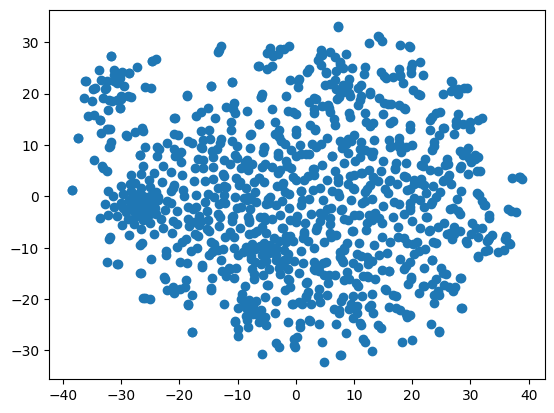

In [144]:
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])

In [145]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [146]:
X = bert_embed_np
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [160]:
for i in range(indices.shape[0]):
  for j in range(indices.shape[1]):
    if j == 0:
      print(f'({input_text[indices[i,j]]})', end=', ')
      continue
    print(input_text[indices[i,j]], end=', ')
  print()
  print()

(college dorm decor), antique decor, wall décor, framed artwork, bright colors, good fabric, almost any outfit, high security, classical design, light filtering, 

(a virtual casino), a grinning metallic skeleton, a sponge interior, a desktop lamp, real clay cones, wooden printed coasters, a protective tube, the nicetown store, bright colors, a discount, 

(empty glass bottle), small bottle, office bag, smoke case edges, toy phone case, one ink bottle, file bag, different type, no ink smell, a table cloth, 

(dji mavic air), matte tpu, balun antenna, chic design, saturday kinght ltd, prismalock technology, all estele designs, shim materials, wolkomhome premium, sauf, 

(multiple shockproof materials ]), safe and durable ], waterproof and durable – pieces, prismalock technology, vivid farm style ], harsh cleaning agents, a super quality thick catpe, priced fast fashion world, dial glass material, a heavy 3 pass foamback liner, 

(traditional 5-pocket styling), contrasting , self-materia

In [150]:
attn_mat = bert_embed_np @ bert_embed_np.T / math.sqrt(bert_embed_np.shape[-1])

In [151]:
attn_mat.shape

torch.Size([1000, 1000])

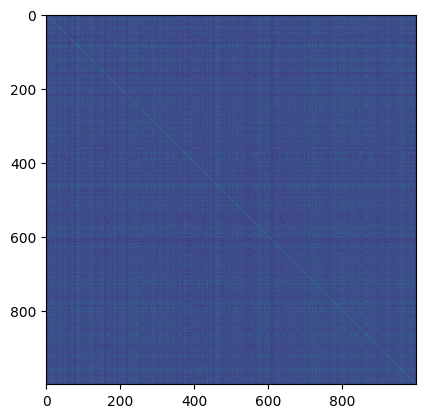

In [152]:
plt.imshow(attn_mat)

In [153]:
sorted_idx_attn = attn_mat.argsort(1)

In [154]:
top_five_attn = sorted_idx_attn[:, -5:]

In [155]:
top_five_attn.shape

torch.Size([1000, 5])

In [157]:
top_five_attn

tensor([[436, 116, 958, 590,   0],
        [125, 811, 728, 469,   1],
        [552,  36, 408, 970,   2],
        ...,
        [216, 968,  21, 614, 997],
        [  6, 291, 402, 592, 998],
        [161, 470, 884, 666, 999]])

In [161]:
for i in range(top_five_attn.shape[0]):
  for j in range(top_five_attn.shape[1]):
    if j == top_five_attn.shape[1] - 1:
      print(f'({input_text[top_five_attn[i,j]]})')
      break
    print(input_text[top_five_attn[i,j]], end=', ')
  print()

color and design, roofing, photo backdrops, wall décor, (college dorm decor)

gaming keyboard, fast-paced , side-scrolling action, other gadgets, microwave ovens, (a virtual casino)

toy phone case, an envelope, wall mirror, small bottle, (empty glass bottle)

hxwxd, cloud 9 bras, chic design, matte tpu, (dji mavic air)

. skid-resistant backing, safe and durable ], soft polyester water-friendly woven lining, lightweight and waterproof material, (multiple shockproof materials ])

front storage zip-up compartments, double zip tshirt, low-end rubber, stylish and trendy rings, (traditional 5-pocket styling)

soft polyester water-friendly woven lining, lightweight and waterproof material, silicone adhesive coating, non-slip rubber baseanti-skid backing, (. skid-resistant backing)

happy diwali, black and red shimmered crop button shrug, stylish and trendy rings, floral printed sarees, (bahubali silk saree)

the oil, the old city, the shimmering qualities, bright metallic and reflective pai

In [182]:
def find_verb_phrase_clusters(verb_phrases, num_clusters):
  # Convert verb phrases to feature vectors
  with torch.no_grad():
    input_ids = tokenizer(verb_phrases, add_special_tokens=True, padding=True, return_tensors='pt')
    last_hidden_states = model(input_ids['input_ids'], input_ids['attention_mask'])
  
  X = torch.stack([
    sent_lhs[:input_ids['attention_mask'][i].sum().item()].mean(0) 
    for i, sent_lhs in enumerate(last_hidden_states.last_hidden_state)
  ])

  # Perform K-means clustering
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)

  # Retrieve the cluster labels
  labels = kmeans.labels_

  # Create a dictionary to store clusters
  clusters = {}
  for i, label in enumerate(labels):
      if label not in clusters:
          clusters[label] = []
      clusters[label].append(verb_phrases[i])

  return clusters

In [183]:
# Example usage
verb_phrases = list(prod_relationships_prod_bps['VP'])

In [184]:
num_clusters = 100

clusters = find_verb_phrase_clusters(verb_phrases, num_clusters)

# Print the clusters
for label, phrases in clusters.items():
    print(f"Cluster {label}:")
    for phrase in phrases:
        print(phrase)
    print()

/Users/rishideychowdhury/Desktop/Amazon-PAE/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster 67:
scarf or shawl or head
peeling , wrinkling or fading
chamfered and slotted
can be crimped or soldered
is double-stitched and riveted or reinforced
has been tweaked
ornamented
is hallmarked and stamped
are cleaned , sanded , primed , painted and sealed
are sparkle laminated or printed
unpainted
rugs fluffy and stylish carpets
not pre-pasted
thread trimmed and wrinkle
to protect , distinguish , and prevent broken and scratched
fraying or shedding
damaged , wrinkled , stained , smudged , abraded
slotted and chamfered
are laminated or printed
are hand-folded and individually inspected
is ergonomically designed to contour
secure fit , easily applied and removed
can simply be left white or painted
can be cut , drilled , glued , or screwed
can cut , emboss and stencil
to prevent tarnishing
does not look pixelated or faded
can be easily sawed , stamped , punched , die cut , sanded , drilled , screwed , nailed , riveted or bonded

Cluster 87:
are best grown
may be dimmed
is widened


In [186]:
# Example usage
noun_phrases = list(prod_relationships_prod_bps['NP'])[:1000]

In [188]:
from torch import mps
mps.empty_cache()

In [190]:
num_clusters = 100

clusters = find_verb_phrase_clusters(noun_phrases, num_clusters)

# Print the clusters
for label, phrases in clusters.items():
    print(f"Cluster {label}:")
    for phrase in phrases:
        print(phrase)
    print()

/Users/rishideychowdhury/Desktop/Amazon-PAE/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster 50:
college dorm decor
a virtual casino
white colored cars
no more holes
gorgeous nature painting
bright metallic and reflective painting
2 matching tiebacks
harsh cleaning agents
graduation gift
warming and christmas
green lantern products
outside cold
antique decor
bright colors
incoming natural light
super fun
big files
light filtering
finished sculptures
these beautiful collections
real clay cones
dangerous chemicals
soft girls boys
wet walls
paranormal powers
sound files
a grinning metallic skeleton
beautiful print

Cluster 89:
empty glass bottle
an envelope
2 money pockets
storage container
decorate cell phone case
one ink bottle
gaming keyboard
a passport wallet
loafer
2 front pockets
file bag
office bag
password combination
. usb port
other standard mugs
larger or small books
pencil holder
drawer etc
pet carrier bag
bedside units
toy phone case
smoke case edges
chest measurements
2 pencils
off-line controller
casual workdays
pantry areas
keyboard typing
the carry bag
on

In [193]:
num_clusters = 100

clusters = find_verb_phrase_clusters_tfidf(noun_phrases, num_clusters)

# Print the clusters
for label, phrases in clusters.items():
    print(f"Cluster {label}:")
    for phrase in phrases:
        print(phrase)
    print()

/Users/rishideychowdhury/Desktop/Amazon-PAE/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster 30:
college dorm decor
those or even home decor
antique decor
an antique 8 pre-fitted steel grommet top detail
antique wall clock
an antique finish front lock and separators

Cluster 19:
a virtual casino
. skid-resistant backing
data transfer speed
plese
boho beaded necklace
audio return channel
1.6 cm
4.56
omega 3
show
diy projects
2 money pockets
pillar
happy diwali
easier application
strong screws
1 package
685 grams
special techniques
a 5x7 portrait
3.1amp fast charging
kolkata
hologrpahic wristband
triple layer
football sleeves
2 pillow covers 46cm x 68cm
weathered patina
festival occasion
1000 dpi scroll wheel
white colored cars
best thread
collapsiblesaves space
closurezipper
those picture-perfect moments
paradise flowers
storage container
full visibility
hand painted painting
france
gunmetal
vetrians day
oakley
perfect valentine gifts
measurement guide
pressure
4xl48
motel
spot treatment
wine
roofing
dormitory
gorgeous nature painting
a passport wallet
precautions
choic

In [16]:
import re

def find_pattern_indices(pattern, text):
    matches = re.finditer(pattern, text)
    indices = [match.start() for match in matches]
    return indices

# Example usage
text = "n(a n(a na"
pattern = r"n\(a"

indices = find_pattern_indices(pattern, text)

In [17]:
indices

[0, 4]